# Compute performance metrics for the given Y and Y_score without sklearn

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion Matrix:- 

Actual       0      1
Predicted            
1          100  10000

Precision: 0.9900990099009901, Recall: 1.0, F1 Score: 0.9950248756218906
Accuracy Score: 0.9900990099009901
AUC: 0.48829900000000004


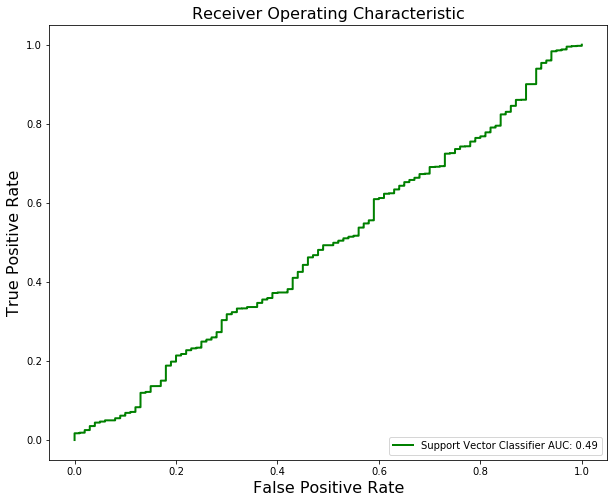

In [3]:
def perf_measure(y_actual, y_predicted):
   
    y_actual, y_predicted = np.array(y_actual), np.array(y_predicted)
    
    TP = np.sum(np.logical_and(y_actual == 1, y_predicted == 1)).item()
    
    FP = np.sum(np.logical_and(y_actual == 0, y_predicted == 1)).item()
    
    TN = np.sum(np.logical_and(y_actual == 0, y_predicted == 0)).item()
    
    FN = np.sum(np.logical_and(y_actual == 1, y_predicted == 0)).item()

    return TN, FN, FP, TP

    
def compute_f1(TN, FN, FP, TP):
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return (precision, recall, 0.0)
    return (precision, recall, f1)


def compute_accuracy_score(TN, FN, FP, TP):
    
    try:
        accuracy_score = (TN + TP) / (TP + FP + TN + FN)
    except ZeroDivisionError:
        return (0.0)
    return accuracy_score


def compute_TPR_FPR(sorted_proba_list, proba_list, y_actual):
    TPR, FPR = [], []   

    sorted_proba_ar = np.array(proba_list)
    for i in sorted_proba_list:
#         y_pred_list = [1 if prob >= i else 0 for prob in sorted_proba_list]
        y_pred_list = (sorted_proba_ar >= i).astype(int)    
            
        TN, FN, FP, TP = perf_measure(y_actual, y_pred_list)    
    
        tpr = TP/(TP+FN)
        fpr = FP/(FP+TN)
        
#         try:
#             tpr = TP/(TP+FN)
#             fpr = FP/(FP+TN)
#         except ZeroDivisionError:
#             tpr = 0.0
#             fpr = 0.0
         
        TPR.append(tpr)
        FPR.append(fpr) 

    return TPR, FPR

df_5a = pd.read_csv('5_a.csv')

# df_5a['y_p'] = [0 if y_score < 0.5 else 1 for y_score in df_5a['proba']]
df_5a['y_p'] = (df_5a['proba'] >= 0.5).astype(int)
                               

y_actual = (df_5a['y'] != 0.0).astype(int)
y_predicted = df_5a['y_p']

df_5a_new = pd.DataFrame(list(zip(y_actual, y_predicted)), columns = ['y_actual','y_predicted'])


exp_series = pd.Series(y_actual)
pred_series = pd.Series(y_predicted)
confusion_matrix = pd.crosstab(df_5a_new['y_predicted'], df_5a_new['y_actual'], rownames=['Predicted'], colnames=['Actual'])

print("Confusion Matrix:- \n")
print(confusion_matrix)

print() 

TN, FN, FP, TP = perf_measure(y_actual, y_predicted)
precision, recall, f1 = compute_f1(TN, FN, FP, TP)  

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

proba_list = list(df_5a['proba'])
df_5a = df_5a.sort_values('proba', ascending = False)
sorted_proba_list = list(df_5a['proba'])

TPR, FPR = compute_TPR_FPR(sorted_proba_list, proba_list, y_actual)

list_tpr_fpr = [[TPR[i], FPR[i]] for i in range(0, len(TPR))]

list_tpr_fpr = sorted(list_tpr_fpr, key=lambda x: x[0])

TPR,FPR =  map(list, zip(*list_tpr_fpr))

print(f"Accuracy Score: {compute_accuracy_score(TN, FN, FP, TP)}")

AUC = np.trapz(TPR, FPR)
print(f"AUC: {AUC}")

plt.figure(figsize = (10, 8))
label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(AUC)
plt.plot(FPR, TPR, c = 'g', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 10)

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

Confusion Matrix:- 

Actual        0   1
Predicted          
0          9761  45
1           239  55

Precision: 0.1870748299319728, Recall: 0.55, F1 Score: 0.2791878172588833
Accuracy Score: 0.9718811881188119
AUC: 0.9377570000000001


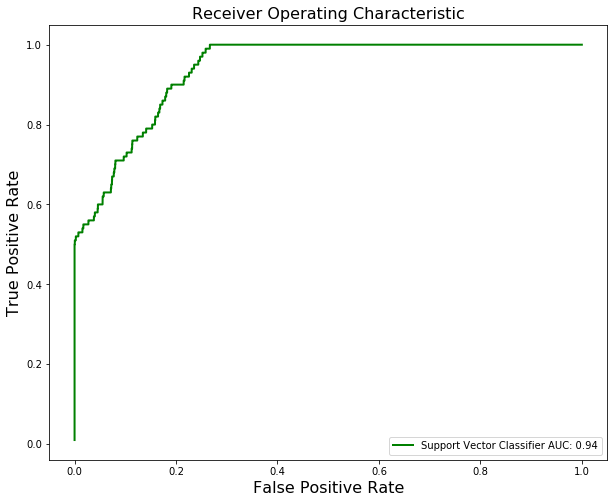

In [4]:
def perf_measure(y_actual, y_predicted):
   
    y_actual, y_predicted = np.array(y_actual), np.array(y_predicted)
    
    TP = np.sum(np.logical_and(y_actual == 1, y_predicted == 1)).item()
    
    FP = np.sum(np.logical_and(y_actual == 0, y_predicted == 1)).item()
    
    TN = np.sum(np.logical_and(y_actual == 0, y_predicted == 0)).item()
    
    FN = np.sum(np.logical_and(y_actual == 1, y_predicted == 0)).item()

    return TN, FN, FP, TP

    
def compute_f1(TN, FN, FP, TP):
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    try:
        f1 = 2 * precision * recall / (precision + recall)
    except ZeroDivisionError:
        return (precision, recall, 0.0)
    return (precision, recall, f1)


def compute_accuracy_score(TN, FN, FP, TP):
    
    try:
        accuracy_score = (TN + TP) / (TP + FP + TN + FN)
    except ZeroDivisionError:
        return (0.0)
    return accuracy_score


def compute_TPR_FPR(sorted_proba_list, proba_list, y_actual):
    TPR, FPR = [], []   

    sorted_proba_ar = np.array(proba_list)
    for i in sorted_proba_list:
#         y_pred_list = [1 if prob >= i else 0 for prob in sorted_proba_list]
        y_pred_list = (sorted_proba_ar >= i).astype(int)    
            
        TN, FN, FP, TP = perf_measure(y_actual, y_pred_list)    
    
        tpr = TP/(TP+FN)
        fpr = FP/(FP+TN)
         
        TPR.append(tpr)
        FPR.append(fpr) 

    return TPR, FPR

df_5b = pd.read_csv('5_b.csv')

# df_5a['y_p'] = [0 if y_score < 0.5 else 1 for y_score in df_5a['proba']]
df_5b['y_p'] = (df_5b['proba'] >= 0.5).astype(int)
                               

y_actual = (df_5b['y'] != 0.0).astype(int)
y_predicted = df_5b['y_p']

df_5b_new = pd.DataFrame(list(zip(y_actual, y_predicted)), columns = ['y_actual','y_predicted'])

exp_series = pd.Series(y_actual)
pred_series = pd.Series(y_predicted)
confusion_matrix = pd.crosstab(df_5b_new['y_predicted'], df_5b_new['y_actual'], rownames=['Predicted'], colnames=['Actual'])

print("Confusion Matrix:- \n")
print(confusion_matrix)

print() 

TN, FN, FP, TP = perf_measure(y_actual, y_predicted)
precision, recall, f1 = compute_f1(TN, FN, FP, TP)  

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

proba_list = list(df_5b['proba'])
df_5b = df_5b.sort_values('proba', ascending = False)
sorted_proba_list = list(df_5b['proba'])

TPR, FPR = compute_TPR_FPR(sorted_proba_list, proba_list, y_actual)

list_tpr_fpr = [[TPR[i], FPR[i]] for i in range(0, len(TPR))]

list_tpr_fpr = sorted(list_tpr_fpr, key=lambda x: x[0])

TPR,FPR =  map(list, zip(*list_tpr_fpr))

print(f"Accuracy Score: {compute_accuracy_score(TN, FN, FP, TP)}")

AUC = np.trapz(TPR, FPR)
print(f"AUC: {AUC}")

plt.figure(figsize = (10, 8))
label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(AUC)
plt.plot(FPR, TPR, c = 'g', label = label, linewidth = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 10)

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [9]:
def perf_measure(y_actual, y_predicted):
   
    y_actual, y_predicted = np.array(y_actual), np.array(y_predicted)
    
    TP = (np.logical_and(y_actual == 1, y_predicted == 1)).sum().item()
    
    FP = np.sum(np.logical_and(y_actual == 0, y_predicted == 1)).item()
    
    TN = np.sum(np.logical_and(y_actual == 0, y_predicted == 0)).item()
    
    FN = np.sum(np.logical_and(y_actual == 1, y_predicted == 0)).item()

    return TN, FN, FP, TP

def compute_A(sorted_prob_list, prob_list, y_actual):
    A, threshold = [], []  
    
    prob_ar = np.array(prob_list) 
    for i in sorted_prob_list:
        threshold.append(i)
        y_pred_list = (prob_ar >= i).astype(int)
            
        TN, FN, FP, TP = perf_measure(y_actual, y_pred_list)
            
        a = (500 * FN) + (100  * FP)            
         
        A.append(a)

    return A, threshold

df_5c = pd.read_csv('5_c.csv')
df_5c.head()

y_actual = df_5c['y']

prob_list = list(df_5c['prob'])
df_5c = df_5c.sort_values('prob')
sorted_prob_list = list(df_5c['prob'])


A, threshold = compute_A(sorted_prob_list, prob_list, y_actual)

print(f"Best threshold value of probability which gives lowest values of metric A({sorted(list(zip(A, threshold)))[0][0]}): ", sorted(list(zip(A, threshold)))[0][1])


Best threshold value of probability which gives lowest values of metric A(141000):  0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [6]:
def compute_MSE(y, pred):
    y_actual, y_pred = np.array(y), np.array(pred)
   
    return ((np.square(y_actual - y_pred).sum()) / N )

# def percentage_error(actual, predicted):
#     res = np.empty(actual.shape)
#     for j in range(actual.shape[0]):
#         if actual[j] != 0:
#             res[j] = (predicted[j] -  actual[j]) / actual[j]
#         else:
#             res[j] = predicted[j] / np.mean(actual)
#     return res

def compute_MAPE(y, y_pred): 
    return (np.sum(np.abs(np.asarray(y_pred)-np.asarray(y))) / np.sum(np.asarray(y))) * 100
#     return np.mean(np.abs(percentage_error(np.asarray(y), np.asarray(y_pred))).sum()) * 100
    
def compute_r_squared(y, pred):
    y_actual, y_pred = np.array(y), np.array(pred)
    
    sse  = np.square( y_pred - y_actual ).sum()
    sst  = np.square( y_actual - y_actual.mean() ).sum()
    return 1 - sse/sst

df_5d = pd.read_csv('5_d.csv')

N = df_5d.shape[0] # Number of row count


pred = list(df_5d['pred'])
y = list(df_5d['y'])

MSE = compute_MSE(y, pred)
print("MSE: ", MSE)

MAPE = compute_MAPE(y, pred)
print("MAPE: ", "{:.2f}".format(MAPE), '%')

R_Squared = compute_r_squared(y, pred)
print("R_Squared: ", R_Squared)

MSE:  177.16569974554707
MAPE:  12.91 %
R_Squared:  0.9563582786990937


**References:**
1. https://stackoverflow.com/
2. https://www.geeksforgeeks.org/
3. https://stackexchange.com/